# **Kasus :**

Erika hendak membeli rumah di daerah King Country, dengan kriteria sebagai berikut :
- Jumlah bedrooms = 5
- Jumlah bathrooms = 3
- Luas rumah = 3600 sqft
- Grade = 7
- Tahun pembuatan = 2000

Bantu Erika untuk memprediksi harga rumah idamannya

Data harga rumah bersumber dari kaggle
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# **Penyelesaian Masalah :**

Menggunakan metode : Multiple Linier Regression

Persamaan :
Y = b + e + m1x1 + m2x2 + ... + mn*xn

- Y = dependent variabel
- mn = koefisien dari persamaan
- xn = independent variabel
- b = intercept
- e = error

Variabel bebas : jumlah kamar tidur, kamar mandi, luas rumah, grade rumah, dan tahun pembangunan

Variabel terikat : Harga

# **Langkah Pengerjaan**

## **Load library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# membaca data

data = "/content/kc_house_data.csv"
df = pd.read_csv(data, usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])  # Read the data directly into df
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


Keterangan setiap kolom :
- bedrooms = jumlah kamar tidur
- bathrooms = jumlah kamar mandi
- sqft_living = luas rumah dalam satuan sqft
- grade = grading system dari pemerintah King Country US
- yr_built = tahun rumah dibangun
- price = harga rumah (US$)

In [12]:
#mengetahui jumlah baris dan kolom
df.shape

(21613, 6)

In [14]:
#mengetahui informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [15]:
#mengetahui statistical description data
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


- Pada feature bathrooms terdapat nilai pecahan. Maka kita ubah dulu jenis data yang semula float menjadi int
- Pada feature bedrooms terdapat nilai 33 dimana itu sangat outlier karna tidak mungkin dalam 1 rumah ada 33 kamar, mungkin itu typo jadi kita ganti menjadi 3

In [28]:
df['bathrooms'] = df['bathrooms'].astype('int')
df['bedrooms'] = df['bedrooms'].astype('int')

In [17]:
df['bedrooms'] = df['bedrooms'].replace(33, 3)

## **Handling Missing Value**

In [18]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

Data tidak memiliki missing value

## **Exploratory Data Analysis**

In [19]:
#melihat lagi data
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


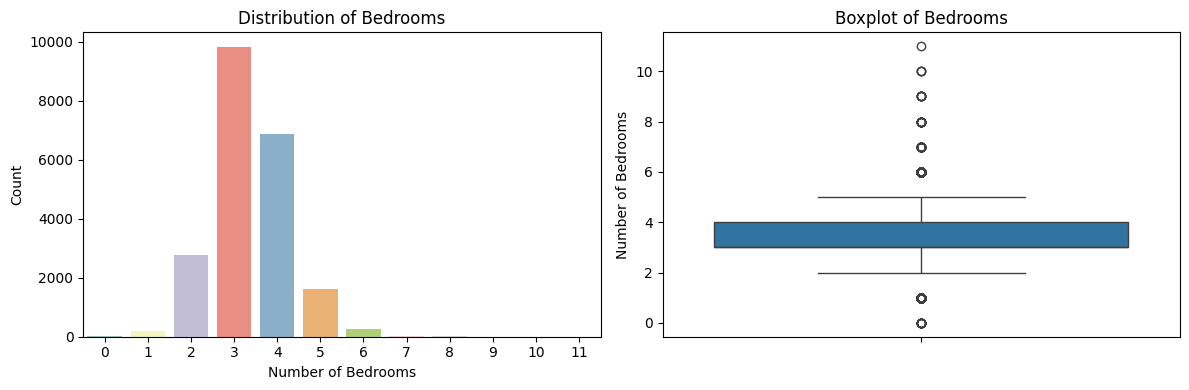

In [48]:
#Univariate analysis bedrooms
#melihat distribusi dari bedrooms

# Membuat plot berdasarkan hasil konversi
f = plt.figure(figsize=(12,4))

# Plotting the countplot for 'bedrooms'
f.add_subplot(1,2,1)
sns.countplot(x='bedrooms', data=df, palette="Set3", hue='bedrooms', legend=False)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Plotting the boxplot for 'bedrooms'
f.add_subplot(1,2,2)
sns.boxplot(y='bedrooms', data=df)
plt.title('Boxplot of Bedrooms')
plt.ylabel('Number of Bedrooms')

# Display the plots
plt.tight_layout()
plt.show()


- Dapat dilihat bahwa sebagian besar jumlah kamar tidur itu ada di angka 3 dan juga 4 kamar tidur
- Data memiliki outliers

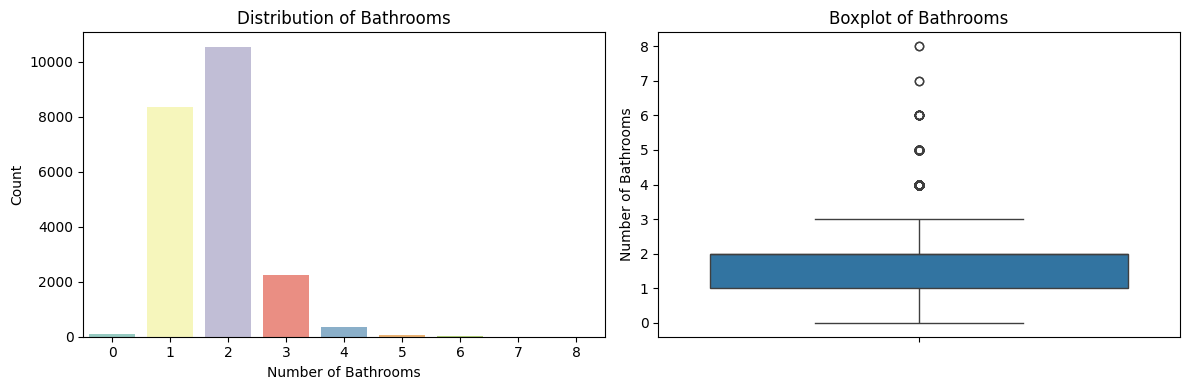

In [57]:
#Univariate analysis bedrooms
#melihat distribusi dari bedrooms

# Membuat plot berdasarkan hasil konversi
f = plt.figure(figsize=(12,4))

# Plotting the countplot for 'bedrooms'
f.add_subplot(1,2,1)
sns.countplot(x='bathrooms', data=df, palette="Set3", hue='bathrooms', legend=False)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

# Plotting the boxplot for 'bedrooms'
f.add_subplot(1,2,2)
sns.boxplot(y='bathrooms', data=df)
plt.title('Boxplot of Bathrooms')
plt.ylabel('Number of Bathrooms')

# Display the plots
plt.tight_layout()
plt.show()


- Dapat dilihat bahwa sebagian besar jumlah kamar mandir itu ada di angka 1 dan juga 2 kamar mandi
- Terdapat rumah yang tidak memiliki kamar mandi
- Data memiliki outliers

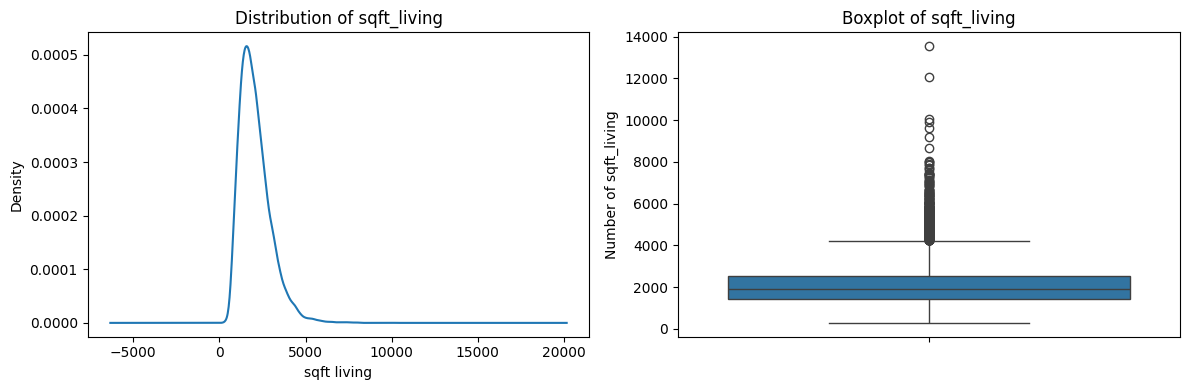

In [54]:
#Univariate analysis sqft_living
#melihat distribusi dari luas rumah

# Membuat plot berdasarkan hasil konversi
f = plt.figure(figsize=(12,4))

# Plotting the for 'sqft_living'
f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')
plt.title('Distribution of sqft_living')
plt.xlabel('sqft living')
plt.ylabel('Density')

# Plotting the boxplot for 'sqft_living'
f.add_subplot(1,2,2)
sns.boxplot(y='sqft_living', data=df)
plt.title('Boxplot of sqft_living')
plt.ylabel('Number of sqft_living')

# Display the plots
plt.tight_layout()
plt.show()

- Density dari distribusi luas rumah berada di sekitar angka 2000an
- Data terdapat outlier

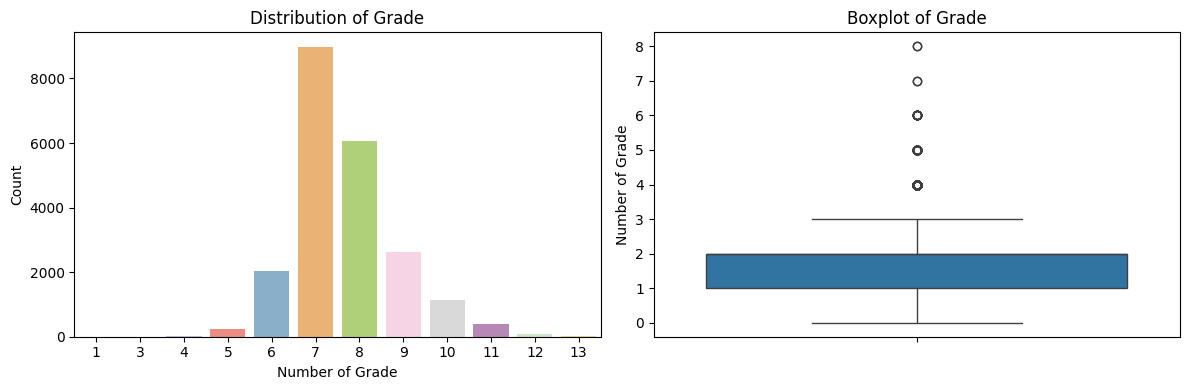

In [56]:
#Univariate analysis grade
#melihat distribusi dari grade

# Membuat plot berdasarkan hasil konversi
f = plt.figure(figsize=(12,4))

# Plotting the countplot for 'grade'
f.add_subplot(1,2,1)
sns.countplot(x='grade', data=df, palette="Set3", hue='grade', legend=False)
plt.title('Distribution of Grade')
plt.xlabel('Number of Grade')
plt.ylabel('Count')

# Plotting the boxplot for 'rade'
f.add_subplot(1,2,2)
sns.boxplot(y='bathrooms', data=df)
plt.title('Boxplot of Grade')
plt.ylabel('Number of Grade')

# Display the plots
plt.tight_layout()
plt.show()

- Sebagian besar rumah di Country King US memiliki grade 7 dan 8
- Dilihat dari boxplot, data memiliki outliers

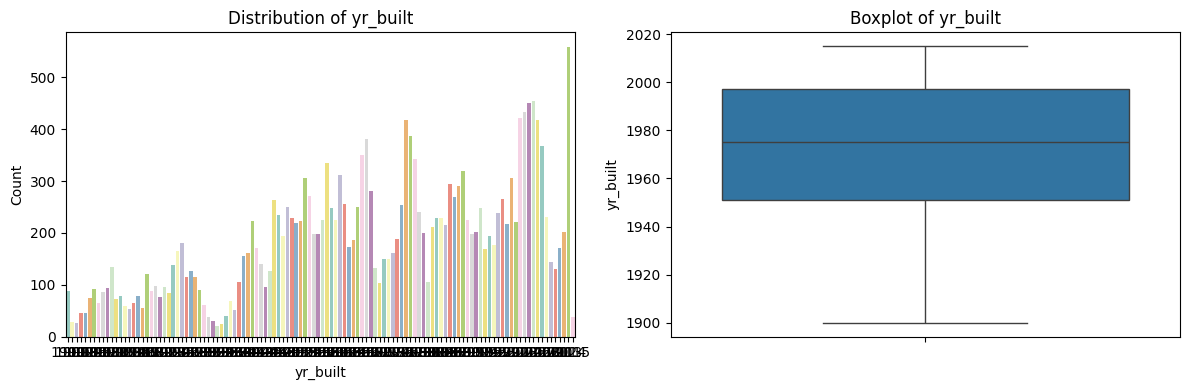

In [61]:
#Univariate analysis yr_built
#melihat distribusi dari yr_built

# Membuat plot berdasarkan hasil konversi
f = plt.figure(figsize=(12,4))

# Plotting the countplot for 'yr_built'
f.add_subplot(1,2,1)
sns.countplot(x='yr_built', data=df, palette="Set3", hue='yr_built', legend=False)
plt.title('Distribution of yr_built')
plt.xlabel('yr_built')
plt.ylabel('Count')

# Plotting the boxplot for 'rade'
f.add_subplot(1,2,2)
sns.boxplot(y='yr_built', data=df)
plt.title('Boxplot of yr_built')
plt.ylabel('yr_built')

# Display the plots
plt.tight_layout()
plt.show()

- Semakin tua umur rumah, maka semakin sedikit orang yang menjual rumahnya tersebut
- Persebaran data paling banyak terdapat di sekitar tahun 1980 an
- Data tidak memiliki outlier

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

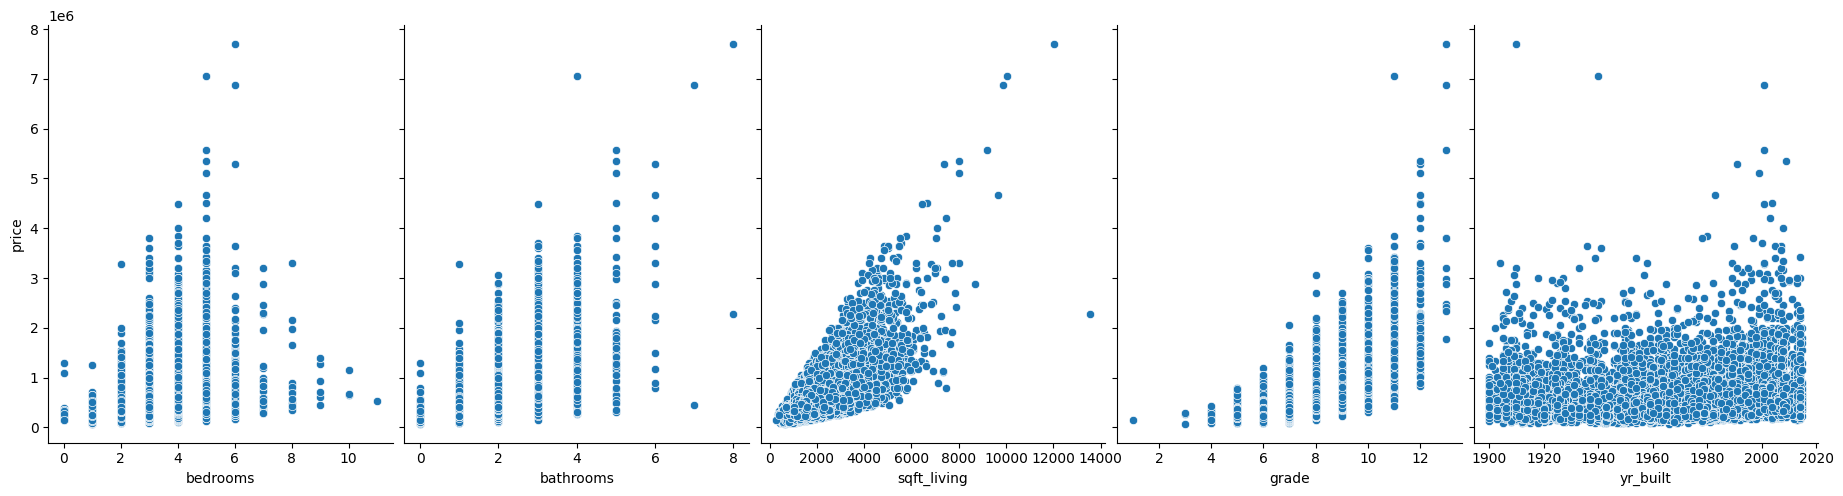

In [65]:
#Bivariate analysis antara independent variable don dependent variabel
#melihat hubungan antara independent dan dependent
#menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt. show()

Bedrooms tidak memiliki korelasi dengan price
Bathrooms, sqft_living., grade, dan yr_built memiliki korelasi positif dengan price

In [72]:
#Mengetahui nilai korelasi dari independent variabel dan dependent variabel
df.corr().style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


- Dapat dilihat bahwa sqft_living mempunyai hubungan linier positif yang sangat kuat dengan price dibandingkan yang lain
- Nilai korelasi yr_built hampir mendekati 0 yang menandakan bahwa usia rumah tidak mempengaruhi harga rumah

## **Modelling**

In [73]:
#Recall data
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [74]:
# Pertama, buat variabel x dan y
x = df.drop(columns='price')
y = df['price']

In [75]:
#Kedua, split data menjadi training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [76]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 5)
(4323, 5)
(17290,)
(4323,)


In [77]:
#Ketiga, bikin object linear regresi
lin_reg = LinearRegression()

In [78]:
#Keempat, train the model menggunakan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [79]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


In [80]:
#Kita coba buat ke dalam dataframe agar lebih rapi
coef_dict ={
    'feature': x.columns,
    'coef': lin_reg.coef_
}
coef_df = pd.DataFrame(coef_dict)
coef_df


,feature,coef
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


Dari nilai m dan b di atas, kalau dimasukkan ke dalam rumus menjadi

Y = -53061.75x1 + 64658.56x2 + 188.91x3 + 131290.89x4 -3969.56x5 + 7031568

In [81]:
y_pred = lin_reg.predict(x_test)

In [82]:
#Keenam, kita cari tau accuracy score model menggunakan testing data yang sudah di split
lin_reg.score(x_test, y_test)

0.61251132869411

Model mendapatkan accuracy score sebesar 61.13%

**Prediction**

- Mari prediksi harga rumah sesuai permintaan Erika :
1. Bedrooms = 5
2. Bathrooms = 3
3. sqft_livng = 3600 sqft
4. Grade = 7
5. yr_built = 2000

In [85]:
#Prediksi harga rumah
lin_reg.predict([[5,3,3600,7,2000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([620228.13307461])

Yeayy! Harga rumah Erika adalah sekitar 620228 US$